In [36]:
#How to convert text to word count vectors with CountVectorizer.
#How to convert text to word frequency vectors with TfidfVectorizer.
#How to convert text to unique integers with HashingVectorizer.

Bag-of-Words Model:

/The model is simple in that it throws away all of the order information in the words and focuses on the occurrence of words in a document.



Word Counts with CountVectorizer

1. Create an instance of the CountVectorizer class.
2. Call the fit() function in order to learn a vocabulary from one or more documents.
3. Call the transform() function on one or more documents as needed to encode each as a vector.

In [37]:
from sklearn.feature_extraction.text import CountVectorizer

In [38]:
# list of text documents
text = ["The quick brown fox jumped over the lazy dog."]

In [39]:
# create the transform
vectorizer = CountVectorizer()

In [40]:
# tokenize and build vocab
vectorizer.fit(text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [41]:
# summarize
print(vectorizer.vocabulary_)

{'the': 7, 'quick': 6, 'brown': 0, 'fox': 2, 'jumped': 3, 'over': 5, 'lazy': 4, 'dog': 1}


In [42]:
# encode document
vector = vectorizer.transform(text)

In [43]:
# summarize encoded vector
print(vector.shape)
print(type(vector))
print(vector.toarray())

(1, 8)
<class 'scipy.sparse.csr.csr_matrix'>
[[1 1 1 1 1 1 1 2]]


In [44]:
# encode another document
text2 = ["the puppy"]
vector = vectorizer.transform(text2)
print(vector.toarray())

[[0 0 0 0 0 0 0 1]]


Word Frequencies with TfidfVectorizer

Issue with word counts : words like “the” will appear many times and their large counts will not be very meaningful in the encoded vectors.

An alternative is to calculate word frequencies, and by far the most popular method is called TF-IDF. This is an acronym than stands for “Term Frequency – Inverse Document” Frequency which are the components of the resulting scores assigned to each word.

1. Term Frequency: This summarizes how often a given word appears within a document.

2. Inverse Document Frequency: This downscales words that appear a lot across documents.

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
# list of text documents
text = ["The quick brown fox jumped over the lazy dog.",
"The dog.",
"The fox"]
# create the transform
vectorizer = TfidfVectorizer()
# tokenize and build vocab
vectorizer.fit(text)
# summarize
print(vectorizer.vocabulary_)
print(vectorizer.idf_)
# encode document
vector = vectorizer.transform([text[0]])
# summarize encoded vector
print(vector.shape)
print(vector.toarray())

{'the': 7, 'quick': 6, 'brown': 0, 'fox': 2, 'jumped': 3, 'over': 5, 'lazy': 4, 'dog': 1}
[1.69314718 1.28768207 1.28768207 1.69314718 1.69314718 1.69314718
 1.69314718 1.        ]
(1, 8)
[[0.36388646 0.27674503 0.27674503 0.36388646 0.36388646 0.36388646
  0.36388646 0.42983441]]


In [46]:
#The scores are normalized to values between 0 and 1 and the encoded document vectors can then be used directly with most machine learning algorithms.

## Hashing with HashingVectorizer

### limitation of count and frequency: vocabulary can become very large.

A clever work around is to use a one way hash of words to convert them to integers. The clever part is that no vocabulary is required and you can choose an arbitrary-long fixed length vector. A downside is that the hash is a one-way function so there is no way to convert the encoding back to a word (which may not matter for many supervised learning tasks).

In [47]:
from sklearn.feature_extraction.text import HashingVectorizer
# list of text documents
text = ["The quick brown fox jumped over the lazy dog."]
# create the transform
vectorizer = HashingVectorizer(n_features=20) #An arbitrary fixed-length vector size of 20 was chosen. 
#(range of the hash function)
# encode document
vector = vectorizer.transform(text)
# summarize encoded vector
print(vector.shape)
print(vector.toarray())

(1, 20)
[[ 0.          0.          0.          0.          0.          0.33333333
   0.         -0.33333333  0.33333333  0.          0.          0.33333333
   0.          0.          0.         -0.33333333  0.          0.
  -0.66666667  0.        ]]


In [48]:
#Tfidftransformer Usage
import pandas as pd
 
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
 
# this is a very toy example, do not try this at home unless you want to understand the usage differences
docs=["the house had a tiny little mouse",
      "the cat saw the mouse",
      "the mouse ran away from the house",
      "the cat finally ate the mouse",
      "the end of the mouse story"
     ]
#create a CountVectorizer to count the number of words (term frequency), limit your vocabulary size, apply stop words and etc
cv=CountVectorizer() ##instantiate CountVectorizer()

# this steps generates word counts for the words in our docs
word_count_vector=cv.fit_transform(docs)

word_count_vector.shape

(5, 16)

In [49]:
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count_vector)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [50]:
# print idf values
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=cv.get_feature_names(),columns=["idf_weights"])
 
# sort ascending
df_idf.sort_values(by=['idf_weights'])

,idf_weights
mouse,1.000000
the,1.000000
cat,1.693147
house,1.693147
ate,2.098612
away,2.098612
end,2.098612
finally,2.098612
from,2.098612
had,2.098612


In [51]:
#The lower the IDF value of a word, the less unique it is to any particular document.

In [52]:
# count matrix
count_vector=cv.transform(docs)
 
# tf-idf scores
tf_idf_vector=tfidf_transformer.transform(count_vector)

In [53]:
feature_names = cv.get_feature_names()
 
#get tfidf vector for first document
first_document_vector=tf_idf_vector[0]
 
#print the scores
df = pd.DataFrame(first_document_vector.T.todense(), index=feature_names, columns=["tfidf"])
df.sort_values(by=["tfidf"],ascending=False)

,tfidf
had,0.493562
little,0.493562
tiny,0.493562
house,0.398203
mouse,0.235185
the,0.235185
ate,0.000000
away,0.000000
cat,0.000000
end,0.000000


## Tfidfvectorizer Usage

In [54]:
#With Tfidfvectorizer you compute the word counts, idf and tf-idf values all at once. It’s really simple.

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer 
 
# settings that you use for count vectorizer will go here
tfidf_vectorizer=TfidfVectorizer(use_idf=True)
 
# just send in all your docs here
tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(docs)

In [56]:
# get the first vector out (for the first document)
first_vector_tfidfvectorizer=tfidf_vectorizer_vectors[0]
 
# place tf-idf values in a pandas data frame
df = pd.DataFrame(first_vector_tfidfvectorizer.T.todense(), index=tfidf_vectorizer.get_feature_names(), columns=["tfidf"])
df.sort_values(by=["tfidf"],ascending=False)

,tfidf
had,0.493562
little,0.493562
tiny,0.493562
house,0.398203
mouse,0.235185
the,0.235185
ate,0.000000
away,0.000000
cat,0.000000
end,0.000000


In [57]:
tfidf_vectorizer=TfidfVectorizer(use_idf=True)
 
# just send in all your docs here
fitted_vectorizer=tfidf_vectorizer.fit(docs)
tfidf_vectorizer_vectors=fitted_vectorizer.transform(docs)

Tfidftransformer vs. Tfidfvectorizer
In summary, the main difference between the two modules are as follows:

With Tfidftransformer you will systematically compute word counts using CountVectorizer and then compute the Inverse Document Frequency (IDF) values and only then compute the Tf-idf scores.

With Tfidfvectorizer on the contrary, you will do all three steps at once. Under the hood, it computes the word counts, IDF values, and Tf-idf scores all using the same dataset.

# Basic Text Pre-Processing

## Converting to lowercase

In [58]:
input_str = "The 5 biggest countries by population in 2017 are China, India, United States, Indonesia, and Brazil."
input_str = input_str.lower()
print(input_str)

the 5 biggest countries by population in 2017 are china, india, united states, indonesia, and brazil.


## Removing number using reg ex

In [59]:
import re
input_str = "Box A contains 3 red and 5 white balls, while Box B contains 4 red and 2 blue balls."
rem_num = re.sub(r'\d+','',input_str)
print(rem_num)

Box A contains  red and  white balls, while Box B contains  red and  blue balls.


## Remove punctuation

In [60]:
import string
input_str = "This &is [an] example? {of} string. with.? punctuation!!!!" # Sample string
print(string.punctuation)
def remove_punct(text):
    rem_punct = "".join([word for word in text if word not in string.punctuation])
    return rem_punct

remove_punct(input_str)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


'This is an example of string with punctuation'

## Remove whitespaces

In [61]:
input_str = " \t a string example\t "
input_str = input_str.strip()
input_str

'a string example'

## Remove stop words

In [133]:
import nltk 
stopword = nltk.corpus.stopwords.words('english')

input_str = "NLTK is a leading platform for building Python programs to work with human language data."

from nltk.tokenize import word_tokenize
tokens = word_tokenize(input_str)
result = [i for i in tokens if not i in stopword]
print (result)

['NLTK', 'leading', 'platform', 'building', 'Python', 'programs', 'work', 'human', 'language', 'data', '.']


In [135]:
text = "present the union SAE PCP DNA اس ہفتے AAP BJP budget for 201011 in #@////[[[[ 2009 wh."
p = re.sub(r"\d+","",text)
print(p)

text_nopunct = "".join([w for w in p if w not in string.punctuation])
print(text_nopunct)

text_noACR = re.sub(r"\b[A-Z]{2,}\b", "", text_nopunct)
print(text_noACR)

text_noeng = " ".join(w for w in nltk.wordpunct_tokenize(text_noACR) if w.lower() in words or not w.isalpha())
print(text_noeng)

tokens = re.split('\W+', text_noeng)
print(tokens)

texts = " ".join([wn.lemmatize(word) for word in tokens if word not in stopword])
print(texts)


#####
#def clean_text(text):
    #text_nopunct = "".join([w for w in text if w not in string.punctuation])
    #text_noACR = re.sub(r"\b[A-Z]{2,}\b", "", text_nopunct)
    #text_noeng = " ".join(w for w in nltk.wordpunct_tokenize(text_noACR) if w.lower() in words or not w.isalpha())
   # tokens = re.split('\W+', text_noeng)
  #  texts = " ".join([wn.lemmatize(word) for word in tokens if word not in stopword])
 #   return texts

#Speeches_Clean = Speeches.apply(lambda x: clean_text(x))
####

present the union SAE PCP DNA اس ہفتے AAP BJP budget for  in #@////[[[[  wh.
present the union SAE PCP DNA اس ہفتے AAP BJP budget for  in   wh
present the union    اس ہفتے   budget for  in   wh
the
['the']



## Stemming
Stemmer converts the tokens to simpler forms by removing the end part of tokens (pluralizers).

In [64]:
from nltk.stem import PorterStemmer
stemmer= PorterStemmer()
input_str="There are several types of stemming algorithms."
input_str=word_tokenize(input_str)
for word in input_str:
    print(stemmer.stem(word))
    
    
words = ["eat", "eats", "eating", "ate"]
ps = PorterStemmer()
for word in words:
    print(ps.stem(word))

there
are
sever
type
of
stem
algorithm
.
eat
eat
eat
ate


In [65]:
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
# We need to download the 'punkt' package to use tokenizers
nltk.download('punkt', download_dir='/tmp/')
nltk.data.path.append("tmp")
ss = SnowballStemmer('english')
sentence = "the children are playing and running. The weather was better yesterday."
words = word_tokenize(sentence)
for word in words:
    print(word + ":" + ss.stem(word))

[nltk_data] Downloading package punkt to /tmp/...
[nltk_data]   Unzipping tokenizers\punkt.zip.


the:the
children:children
are:are
playing:play
and:and
running:run
.:.
The:the
weather:weather
was:was
better:better
yesterday:yesterday
.:.


## Lemmatization
Lemmatizer uses dictionary root to map the tokens. It also works better when the token position tag ("noun", "verb", etc. ) is provided.The first example is without word tags.

In [66]:
# Download the wordnet package
nltk.download('wordnet', download_dir='/tmp/')
nltk.data.path.append("tmp")
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
wl = WordNetLemmatizer()
sentence = "the children are playing and running. the weather was better yesterday."
words = word_tokenize(sentence)
for word in words:
    print(word + ":" + wl.lemmatize(word))

[nltk_data] Downloading package wordnet to /tmp/...
[nltk_data]   Unzipping corpora\wordnet.zip.


the:the
children:child
are:are
playing:playing
and:and
running:running
.:.
the:the
weather:weather
was:wa
better:better
yesterday:yesterday
.:.


In [63]:
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
input_str="been had done languages cities mice"
input_str=word_tokenize(input_str)
for word in input_str:
    print(lemmatizer.lemmatize(word))

been
had
done
language
city
mouse


Improved Lemmatization

Let's use the token position tags this time. Lemmatizer does a better job when we use the tag information that is also calculated using NLTK's postition tags.


In [67]:
import nltk
from nltk.corpus import wordnet
# Download the tagging package
nltk.download('averaged_perceptron_tagger', download_dir='/tmp/')
nltk.data.path.append("tmp")
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
wl = WordNetLemmatizer()
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
sentence = "the children are playing and running. the weather was better yesterday."
words = word_tokenize(sentence)
word_pos_tags = nltk.pos_tag(words)
print("Tags", word_pos_tags)
for idx, tag in enumerate(word_pos_tags):
    print(words[idx], wl.lemmatize(tag[0], get_wordnet_pos(tag[1])))

[nltk_data] Downloading package averaged_perceptron_tagger to /tmp/...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


Tags [('the', 'DT'), ('children', 'NNS'), ('are', 'VBP'), ('playing', 'VBG'), ('and', 'CC'), ('running', 'VBG'), ('.', '.'), ('the', 'DT'), ('weather', 'NN'), ('was', 'VBD'), ('better', 'JJR'), ('yesterday', 'NN'), ('.', '.')]
the the
children child
are be
playing play
and and
running run
. .
the the
weather weather
was be
better good
yesterday yesterday
. .


## Part of speech tagging (POS)

In [64]:
input_str="Parts of speech examples: an article, to write, interesting, easily, and, of"
from textblob import TextBlob
result = TextBlob(input_str)
print(result.tags)

[('Parts', 'NNS'), ('of', 'IN'), ('speech', 'NN'), ('examples', 'NNS'), ('an', 'DT'), ('article', 'NN'), ('to', 'TO'), ('write', 'VB'), ('interesting', 'VBG'), ('easily', 'RB'), ('and', 'CC'), ('of', 'IN')]


## Chunking (shallow parsing)

Chunking is a natural language process that identifies constituent parts of sentences (nouns, verbs, adjectives, etc.) and links them to higher order units that have discrete grammatical meanings (noun groups or phrases, verb groups, etc.)

In [65]:
reg_exp = "NP: {<DT>?<JJ>*<NN>}"
rp = nltk.RegexpParser(reg_exp)
result = rp.parse(result.tags)
print(result)

(S
  Parts/NNS
  of/IN
  (NP speech/NN)
  examples/NNS
  (NP an/DT article/NN)
  to/TO
  write/VB
  interesting/VBG
  easily/RB
  and/CC
  of/IN)


In [66]:
# It’s also possible to draw the sentence tree structure using code 
result.draw()

KeyboardInterrupt: 

# Bag Of Words (BoW) Representation

In [70]:
corpus = ["good movie but too long",
          "interesting movie"]
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(binary=True)
features = count_vectorizer.fit_transform(corpus)
# Let's write the binary features to a data Pandas data frame
df = pd.DataFrame(features.toarray(), columns=count_vectorizer.get_feature_names())
print(df)

   but  good  interesting  long  movie  too
0    1     1            0     1      1    1
1    0     0            1     0      1    0


Binary Feature Vectors:

In this representation, each token has a value of 1 if it occurs in the sentence and 0 otherwise. We will use CountVectorizer() function of the Sklearn library.


In [71]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(binary=True)
features = count_vectorizer.fit_transform(corpus)
# Let's write the binary features to a data Pandas data frame
df = pd.DataFrame(features.toarray(), columns=count_vectorizer.get_feature_names())
print(df)

   but  good  interesting  long  movie  too
0    1     1            0     1      1    1
1    0     0            1     0      1    0


N-grams:

N-grams use “N” consecutive words in this representation. Let's use 2 grams using our sample sentences. You can see our vocabulary size increased with the addition of new 2 grams.


In [72]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(binary=True, ngram_range=(1, 2))
features = count_vectorizer.fit_transform(corpus)
# Let's write the binary features to a data Pandas data frame
df = pd.DataFrame(features.toarray(), columns=count_vectorizer.get_feature_names())
print(df)

   but  but too  good  good movie  interesting  interesting movie  long  \
0    1        1     1           1            0                  0     1   
1    0        0     0           0            1                  1     0   

   movie  movie but  too  too long  
0      1          1    1         1  
1      1          0    0         0  


# TF-IDF

TF-IDF is an important tool when performing text mining, topic modeling among and other Natural Language Processing techniques. It is becouse TF-IDF allows us to assess the relevenca of terms or words related to a set of documents (also known as curpus)

To play around with them a bit, and see how to apply it, let's work with a very simple example, but capable ilustrate very clearly the main idea on how to use this score. We will use two sentences in this example. Each one will be a document in our corpus:


In [73]:
docA = """Python is a 2000 made-for-TV horror movie directed by Richard
Clabaugh. The film features several cult favorite actors, including William
Zabka of The Karate Kid fame, Wil Wheaton, Casper Van Dien, Jenny McCarthy,
Keith Coogan, Robert Englund (best known for his role as Freddy Krueger in the
A Nightmare on Elm Street series of films), Dana Barron, David Bowe, and Sean
Whalen. The film concerns a genetically engineered snake, a python, that
escapes and unleashes itself on a small town. It includes the classic final
girl scenario evident in films like Friday the 13th. It was filmed in Los Angeles,
 California and Malibu, California. Python was followed by two sequels: Python
 II (2002) and Boa vs. Python (2004), both also made-for-TV films."""

In [74]:
docB = """The Colt Python is a .357 Magnum caliber revolver formerly
manufactured by Colt's Manufacturing Company of Hartford, Connecticut.
It is sometimes referred to as a "Combat Magnum".[1] It was first introduced
in 1955, the same year as Smith &amp; Wesson's M29 .44 Magnum. The now discontinued
Colt Python targeted the premium revolver market segment. Some firearm
collectors and writers such as Jeff Cooper, Ian V. Hogg, Chuck Hawks, Leroy
Thompson, Renee Smeets and Martin Dougherty have described the Python as the
finest production revolver ever made."""

Data Preprocessing

We have to perform some preparation on these data in order to use them for our exercice. Our first task is to separate every word in the texts into single elements that, in the language used for natural language processing (NLP), is usually called tokens

Most of text processing in NLP use tokens as their basic elemens.

So, we will use a list of tokens instead, to create what is usually called "Bag of Words (another commom term used in NLP):


In [75]:
bowA = docA.split(" ")
bowB = docB.split(" ")
print("bowA: {}".format(bowA))
print("bowB: {}".format(bowB))

bowA: ['Python', 'is', 'a', '2000', 'made-for-TV', 'horror', 'movie', 'directed', 'by', 'Richard\nClabaugh.', 'The', 'film', 'features', 'several', 'cult', 'favorite', 'actors,', 'including', 'William\nZabka', 'of', 'The', 'Karate', 'Kid', 'fame,', 'Wil', 'Wheaton,', 'Casper', 'Van', 'Dien,', 'Jenny', 'McCarthy,\nKeith', 'Coogan,', 'Robert', 'Englund', '(best', 'known', 'for', 'his', 'role', 'as', 'Freddy', 'Krueger', 'in', 'the\nA', 'Nightmare', 'on', 'Elm', 'Street', 'series', 'of', 'films),', 'Dana', 'Barron,', 'David', 'Bowe,', 'and', 'Sean\nWhalen.', 'The', 'film', 'concerns', 'a', 'genetically', 'engineered', 'snake,', 'a', 'python,', 'that\nescapes', 'and', 'unleashes', 'itself', 'on', 'a', 'small', 'town.', 'It', 'includes', 'the', 'classic', 'final\ngirl', 'scenario', 'evident', 'in', 'films', 'like', 'Friday', 'the', '13th.', 'It', 'was', 'filmed', 'in', 'Los', 'Angeles,\n', 'California', 'and', 'Malibu,', 'California.', 'Python', 'was', 'followed', 'by', 'two', 'sequels:', '

Now, let's join this to lists into a sinlge word set:

In [76]:
wordSet = set(bowA).union(set(bowB))
print("wordSet: {}".format(wordSet))

wordSet: {'on', 'several', 'II', 'series', 'Bowe,', 'genetically', 'same', 'and', 'writers', 'Angeles,\n', 'California.', 'Smeets', 'Wil', '(2004),', 'Casper', 'Cooper,', '13th.', 'python,', 'revolver', 'in', 'Magnum', 'Street', 'Martin', 'including', 'fame,', 'vs.', 'described', 'Smith', 'itself', 'It', '.357', 'Connecticut.\nIt', 'as', 'engineered', 'have', 'followed', 'that\nescapes', 'Nightmare', 'The', 'market', "Wesson's", 'to', 'Sean\nWhalen.', 'includes', 'first', 'formerly\nmanufactured', 'favorite', 'William\nZabka', 'cult', 'final\ngirl', 'Colt', 'known', 'unleashes', 'Malibu,', 'California', 'premium', 'Dana', 'Jenny', 'Ian', 'V.', 'the\nfinest', 'Kid', 'Van', 'features', 'of', 'Barron,', 'Magnum.', '"Combat', 'introduced\nin', 'Dien,', '.44', 'horror', 'now', 'a', 'actors,', 'Los', 'scenario', 'Hartford,', 'evident', 'Some', 'targeted', 'Python', 'Hawks,', 'the\nA', 'Karate', 'Boa', 'Dougherty', 'the', '(best', 'was', 'directed', 'Magnum".[1]', 'discontinued\nColt', 'by', 

Now we will proceed to transform both lists into what is called a Bag of Words. it is a simplifyed representation used in natural language processing and information retrieval (IR). In this model, a text (such as a sentence or a document) is represented as the bag (multiset) of its words, disregarding grammar and even word order but keeping multiplicity. We will first initialize every token count with 0:


In [78]:
wordDictA = dict.fromkeys(wordSet, 0) 
wordDictB = dict.fromkeys(wordSet, 0)
print("wordDictA: {}".format(wordDictA))
print("\n\nwordDictB: {}".format(wordDictB))

wordDictA: {'on': 0, 'several': 0, 'II': 0, 'series': 0, 'Bowe,': 0, 'genetically': 0, 'same': 0, 'and': 0, 'writers': 0, 'Angeles,\n': 0, 'California.': 0, 'Smeets': 0, 'Wil': 0, '(2004),': 0, 'Casper': 0, 'Cooper,': 0, '13th.': 0, 'python,': 0, 'revolver': 0, 'in': 0, 'Magnum': 0, 'Street': 0, 'Martin': 0, 'including': 0, 'fame,': 0, 'vs.': 0, 'described': 0, 'Smith': 0, 'itself': 0, 'It': 0, '.357': 0, 'Connecticut.\nIt': 0, 'as': 0, 'engineered': 0, 'have': 0, 'followed': 0, 'that\nescapes': 0, 'Nightmare': 0, 'The': 0, 'market': 0, "Wesson's": 0, 'to': 0, 'Sean\nWhalen.': 0, 'includes': 0, 'first': 0, 'formerly\nmanufactured': 0, 'favorite': 0, 'William\nZabka': 0, 'cult': 0, 'final\ngirl': 0, 'Colt': 0, 'known': 0, 'unleashes': 0, 'Malibu,': 0, 'California': 0, 'premium': 0, 'Dana': 0, 'Jenny': 0, 'Ian': 0, 'V.': 0, 'the\nfinest': 0, 'Kid': 0, 'Van': 0, 'features': 0, 'of': 0, 'Barron,': 0, 'Magnum.': 0, '"Combat': 0, 'introduced\nin': 0, 'Dien,': 0, '.44': 0, 'horror': 0, 'now':

Now we fill the bag of words with the correct token counting:

In [79]:
for word in bowA:
    wordDictA[word]+=1
for word in bowB:
    wordDictB[word]+=1
print("wordDictA: {}".format(wordDictA))

wordDictA: {'on': 2, 'several': 1, 'II': 1, 'series': 1, 'Bowe,': 1, 'genetically': 1, 'same': 0, 'and': 4, 'writers': 0, 'Angeles,\n': 1, 'California.': 1, 'Smeets': 0, 'Wil': 1, '(2004),': 1, 'Casper': 1, 'Cooper,': 0, '13th.': 1, 'python,': 1, 'revolver': 0, 'in': 3, 'Magnum': 0, 'Street': 1, 'Martin': 0, 'including': 1, 'fame,': 1, 'vs.': 1, 'described': 0, 'Smith': 0, 'itself': 1, 'It': 2, '.357': 0, 'Connecticut.\nIt': 0, 'as': 1, 'engineered': 1, 'have': 0, 'followed': 1, 'that\nescapes': 1, 'Nightmare': 1, 'The': 3, 'market': 0, "Wesson's": 0, 'to': 0, 'Sean\nWhalen.': 1, 'includes': 1, 'first': 0, 'formerly\nmanufactured': 0, 'favorite': 1, 'William\nZabka': 1, 'cult': 1, 'final\ngirl': 1, 'Colt': 0, 'known': 1, 'unleashes': 1, 'Malibu,': 1, 'California': 1, 'premium': 0, 'Dana': 1, 'Jenny': 1, 'Ian': 0, 'V.': 0, 'the\nfinest': 0, 'Kid': 1, 'Van': 1, 'features': 1, 'of': 2, 'Barron,': 1, 'Magnum.': 0, '"Combat': 0, 'introduced\nin': 0, 'Dien,': 1, '.44': 0, 'horror': 1, 'now':

In [80]:
print("wordDictB: {}".format(wordDictB))

wordDictB: {'on': 0, 'several': 0, 'II': 0, 'series': 0, 'Bowe,': 0, 'genetically': 0, 'same': 1, 'and': 2, 'writers': 1, 'Angeles,\n': 0, 'California.': 0, 'Smeets': 1, 'Wil': 0, '(2004),': 0, 'Casper': 0, 'Cooper,': 1, '13th.': 0, 'python,': 0, 'revolver': 3, 'in': 0, 'Magnum': 1, 'Street': 0, 'Martin': 1, 'including': 0, 'fame,': 0, 'vs.': 0, 'described': 1, 'Smith': 1, 'itself': 0, 'It': 1, '.357': 1, 'Connecticut.\nIt': 1, 'as': 4, 'engineered': 0, 'have': 1, 'followed': 0, 'that\nescapes': 0, 'Nightmare': 0, 'The': 2, 'market': 1, "Wesson's": 1, 'to': 1, 'Sean\nWhalen.': 0, 'includes': 0, 'first': 1, 'formerly\nmanufactured': 1, 'favorite': 0, 'William\nZabka': 0, 'cult': 0, 'final\ngirl': 0, 'Colt': 1, 'known': 0, 'unleashes': 0, 'Malibu,': 0, 'California': 0, 'premium': 1, 'Dana': 0, 'Jenny': 0, 'Ian': 1, 'V.': 1, 'the\nfinest': 1, 'Kid': 0, 'Van': 0, 'features': 0, 'of': 1, 'Barron,': 0, 'Magnum.': 1, '"Combat': 1, 'introduced\nin': 1, 'Dien,': 0, '.44': 1, 'horror': 0, 'now':

Data Visualization

It is always helpful to look at the quality of the data we are working with. Let's look at our bag of words to see if we did a good job counting the token frequency. Let's take a look at that in a more fancy way using the Pandas library:


In [81]:
import pandas as pd
pd.DataFrame([wordDictA, wordDictB])

,on,several,II,series,"Bowe,",genetically,same,and,writers,"Angeles,\n",...,classic,2000,Python\n,Chuck,"snake,",both,such,David,"Wheaton,",Company
0,2,1,1,1,1,1,0,4,0,1,...,1,1,1,0,1,1,0,1,1,0
1,0,0,0,0,0,0,1,2,1,0,...,0,0,0,1,0,0,1,0,0,1


## Calculating Term Frequency (TF)

Let''s create a function to calculate that and compute TF for each document:

In [83]:
def computeTF(wordDict, bow):
    tfDict = {}
    bowCount = len(bow)
    for word, count in wordDict.items():
        tfDict[word] = count/float(bowCount)
    return tfDict

In [91]:
tfBowA = computeTF(wordDictA, bowA)
items = 0
for key, value in sorted(tfBowA.iteritems(), key=lambda (k,v): (v,k), reverse=True):
    items += 1
    print "%s: %s" % (key, value)
    if items > 5:
        break

SyntaxError: invalid syntax (<ipython-input-91-700cea1ede21>, line 3)

In [88]:
tfBowB = computeTF(wordDictB, bowB)
items = 0
for key, value in sorted(tfBowB.iteritems(), key=lambda (k,v): (v,k), reverse=True):
    items += 1
    print "%s: %s" % (key, value)
    if items > 5:
        break

SyntaxError: invalid syntax (<ipython-input-88-f60f57c2d326>, line 3)

# Binary Term Frequency

    - We will use Sklearn's CountVectorizer() function with binary=True parameter.
    - Let's talk about fit() and transform() functions.
        fit() function "fits" the text data and creates the vocabulary on the text.
        transform() function calculates the needed vector numbers. They are, in this case, binary values 0s or 1s.
    - We can get the feature vectors with this: features.toarray() This gives you a multi-dim numpy array.
    - Then, we will put the result into a data frame for nice result visualization.

In [93]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
texts = ["good movie", "bad acting", "it was boring movie"]
vectorizer = CountVectorizer(binary=True)
vectorizer.fit(texts)
features = vectorizer.transform(texts)
df = pd.DataFrame(features.toarray(), columns=vectorizer.get_feature_names())
print("Texts:", texts)
print("--------------------------------------------------------")
print(df)

Texts: ['good movie', 'bad acting', 'it was boring movie']
--------------------------------------------------------
   acting  bad  boring  good  it  movie  was
0       0    0       0     1   0      1    0
1       1    1       0     0   0      0    0
2       0    0       1     0   1      1    1


# Word counts

    - We will use Sklearn's CountVectorizer() function.
    - fit() function "fits" the text data and creates the vocabulary on the text.
    - transform() function calculates the needed vector numbers. They are raw token/word counts for this example.
    - We can get the feature vectors with this: features.toarray() This gives you a multi-dim numpy array.
    - Then, we will put the result into a data frame for nice result visualization.

In [95]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
texts = ["good movie", "bad acting", "it was boring movie"]
vectorizer = CountVectorizer()
vectorizer.fit(texts)
features = vectorizer.transform(texts)
df = pd.DataFrame(features.toarray(), columns=vectorizer.get_feature_names())
print("Texts:", texts)
print("--------------------------------------------------------")
print(df)

Texts: ['good movie', 'bad acting', 'it was boring movie']
--------------------------------------------------------
   acting  bad  boring  good  it  movie  was
0       0    0       0     1   0      1    0
1       1    1       0     0   0      0    0
2       0    0       1     0   1      1    1


# N-grams

We can use N-grams in our feature vectors. This will help us getting token sequences. The example below uses 1-grams (regular tokens) and 2-grams (2 consecutive tokens). Pay attention to our new vocabulary, it gest BIGGER because of additional 2-grams.

In [96]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
texts = ["good movie", "bad acting", "it was boring movie"]
# CountVectorizer(ngram_range = (ngram_low_limit, ngram_up_limit)) 
vectorizer = CountVectorizer(ngram_range=(1, 2))
vectorizer.fit(texts)
features = vectorizer.transform(texts)
df = pd.DataFrame(features.toarray(), columns=vectorizer.get_feature_names())
print("Texts:", texts)
print("--------------------------------------------------------")
print(df)

Texts: ['good movie', 'bad acting', 'it was boring movie']
--------------------------------------------------------
   acting  bad  bad acting  boring  boring movie  good  good movie  it  \
0       0    0           0       0             0     1           1   0   
1       1    1           1       0             0     0           0   0   
2       0    0           0       1             1     0           0   1   

   it was  movie  was  was boring  
0       0      1    0           0  
1       0      0    0           0  
2       1      1    1           1  


# Term Frequencies

    - We will use Sklearn's TfidfVectorizer() function with use_idf=False parameter.
    - fit() function "fits" the text data and creates the vocabulary on the text.
    - transform() function calculates term frequencies. SKlearn automatically applies L2 normalization to each vector.
    - We can get the feature vectors with this: features.toarray() This gives you a multi-dim numpy array.
    - Then, we will put the result into a data frame for nice result visualization.

In [98]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

texts = ["good movie", "bad acting", "it was boring movie"]
vectorizer = TfidfVectorizer(use_idf=False)
vectorizer.fit(texts)
features = vectorizer.transform(texts)
df = pd.DataFrame(features.toarray(), columns=vectorizer.get_feature_names())
print("Texts:", texts)
print("--------------------------------------------------------")
print(df)

Texts: ['good movie', 'bad acting', 'it was boring movie']
--------------------------------------------------------
     acting       bad  boring      good   it     movie  was
0  0.000000  0.000000     0.0  0.707107  0.0  0.707107  0.0
1  0.707107  0.707107     0.0  0.000000  0.0  0.000000  0.0
2  0.000000  0.000000     0.5  0.000000  0.5  0.500000  0.5


# TF - IDF

    - We will use Sklearn's TfidfVectorizer() function.
    - fit() function "fits" the text data and creates the vocabulary on the text.
    - transform() function calculates term freq. - inverse document frequencies (TF-IDF). SKlearn automatically applies L2 normalization to each vector.
    - We can get the feature vectors with this: features.toarray() This gives you a multi-dim numpy array.
    - Then, we will put the result into a data frame for nice result visualization.

In [99]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
texts = ["good movie", "bad acting", "it was boring movie"]
vectorizer = TfidfVectorizer()
vectorizer.fit(texts)
features = vectorizer.transform(texts)
df = pd.DataFrame(features.toarray(), columns=vectorizer.get_feature_names())
print("Texts:", texts)
print("--------------------------------------------------------")
print(df)

Texts: ['good movie', 'bad acting', 'it was boring movie']
--------------------------------------------------------
     acting       bad    boring      good        it     movie       was
0  0.000000  0.000000  0.000000  0.795961  0.000000  0.605349  0.000000
1  0.707107  0.707107  0.000000  0.000000  0.000000  0.000000  0.000000
2  0.000000  0.000000  0.528635  0.000000  0.528635  0.402040  0.528635


## Vectorizing with limited feature size (smaller vocabulary)

Sometimes we may need to reduce the size of our feature array for faster training and better generalization. In this case, we can use the max_features parameter. This will keep the most important features by the given feature size.


In [100]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
texts = ["good movie", "bad acting", "it was boring movie"]
vectorizer = TfidfVectorizer(max_features=3)    # TF-IDF 
#vectorizer = CountVectorizer(max_features=3)  # Word counts
vectorizer.fit(texts)
features = vectorizer.transform(texts)
df = pd.DataFrame(features.toarray(), columns=vectorizer.get_feature_names())

print("Texts:", texts)
print("--------------------------------------------------------")
print(df)

Texts: ['good movie', 'bad acting', 'it was boring movie']
--------------------------------------------------------
     acting       bad  movie
0  0.000000  0.000000    1.0
1  0.707107  0.707107    0.0
2  0.000000  0.000000    1.0


Additional Capstone

In [102]:
from textblob import TextBlob
def POS_Tag(input_str):
    result = TextBlob(input_str)
    results = print(result.tags)
    return results

Speech_POS = Speeches.astype(str).apply(lambda x: POS_Tag(x))

NameError: name 'Speeches' is not defined

In [103]:
# put each word and the count into a dictionary
freqDist={}
for t in sorted(set(Speech3)):
    freqDist[t]=Speech3.count(t)
    
len(dict(list(freqDist.items())))
(dict(list(freqDist.items())))

NameError: name 'Speech3' is not defined

In [104]:
def bagOfWords(tokens):
    '''
    Given list of tokens, return a dictionary where 
         keys  = words in the text
         value = count of the words in the text    
    '''    
    # put each word and the count into a dictionary
    freqDist={}
    for t in sorted(set(tokens)):
        freqDist[t]=tokens.count(t)
        
    return freqDist


# to use the function
bags=bagOfWords(Speech3)
print({k: bags[k] for k in list(bags.keys())},' of ', len(bags), ' words')

NameError: name 'Speech3' is not defined

#### The following function bagOfWord will return a dictionary of words in the text and the frequency on how often each the word has been utilized in the text.

In [105]:
#It would be interesting to see the most frequent words in the text.
sortedBags = sorted(bags.items(), key=lambda x: x[1], reverse=True)
sortedBags[:50]

NameError: name 'bags' is not defined

In [106]:
bigramCount={}
for t in sorted(set(bigram)):
    bigramCount[t]=bigram.count(t)
sortedBigram = sorted(bigramCount.items(), key=lambda x: x[1], reverse=True)
sortedBigram[:10]

NameError: name 'bigram' is not defined

# CountVectorizer With Custom StopWords

In [109]:
cat_in_the_hat_docs=[
      "One Cent, Two Cents, Old Cent, New Cent: All About Money (Cat in the Hat's Learning Library",
      "Inside Your Outside: All About the Human Body (Cat in the Hat's Learning Library)",
      "Oh, The Things You Can Do That Are Good for You: All About Staying Healthy (Cat in the Hat's Learning Library)",
      "On Beyond Bugs: All About Insects (Cat in the Hat's Learning Library)",
      "There's No Place Like Space: All About Our Solar System (Cat in the Hat's Learning Library)" 
     ]
cv = CountVectorizer(cat_in_the_hat_docs,stop_words=["all","in","the","is","and"])
count_vector=cv.fit_transform(cat_in_the_hat_docs)
count_vector.shape


(5, 40)

In [110]:
#any stop words that we explicitly specified?
cv.stop_words


['all', 'in', 'the', 'is', 'and']

In [111]:

#any stop words internally stopped by countvectorizer?
cv.stop_words_

set()

# CountVectorizer With Predefined StopWords

In [112]:
cv = CountVectorizer(cat_in_the_hat_docs,stop_words="english")
count_vector=cv.fit_transform(cat_in_the_hat_docs)


In [113]:
# the shape should be smaller
count_vector.shape


(5, 24)

In [114]:
#any stop words that we explicitly specified?
cv.stop_words


'english'

In [115]:

#any stop words internally stopped by countvectorizer?
cv.stop_words_

set()

In [116]:
# much smaller vocabulary with stopwords applied
cv.vocabulary_

{'cent': 3,
 'cents': 4,
 'old': 17,
 'new': 15,
 'money': 14,
 'cat': 2,
 'hat': 6,
 'learning': 11,
 'library': 12,
 'inside': 10,
 'outside': 18,
 'human': 8,
 'body': 0,
 'oh': 16,
 'things': 23,
 'good': 5,
 'staying': 22,
 'healthy': 7,
 'bugs': 1,
 'insects': 9,
 'place': 19,
 'like': 13,
 'space': 21,
 'solar': 20}

In [117]:
# ignore terms that appeared in less than n documents (can be proportion or absolute counts)
cv = CountVectorizer(cat_in_the_hat_docs,min_df=2)
count_vector=cv.fit_transform(cat_in_the_hat_docs)

In [118]:
#any stop words internally stopped by countvectorizer?
cv.stop_words_

{'are',
 'beyond',
 'body',
 'bugs',
 'can',
 'cent',
 'cents',
 'do',
 'for',
 'good',
 'healthy',
 'human',
 'insects',
 'inside',
 'like',
 'money',
 'new',
 'no',
 'oh',
 'old',
 'on',
 'one',
 'our',
 'outside',
 'place',
 'solar',
 'space',
 'staying',
 'system',
 'that',
 'there',
 'things',
 'two',
 'you',
 'your'}

In [119]:
count_vector.shape

(5, 8)

In [120]:
# use proportion here. Ignore terms that occurred in less than 25% of the documents
cv = CountVectorizer(cat_in_the_hat_docs,min_df=0.25)
count_vector=cv.fit_transform(cat_in_the_hat_docs)

In [121]:
count_vector.shape


(5, 8)

In [122]:
cv.vocabulary_


{'all': 1,
 'about': 0,
 'cat': 2,
 'in': 4,
 'the': 7,
 'hat': 3,
 'learning': 5,
 'library': 6}

In [123]:

#any stop words internally stopped by countvectorizer?
cv.stop_words_

{'are',
 'beyond',
 'body',
 'bugs',
 'can',
 'cent',
 'cents',
 'do',
 'for',
 'good',
 'healthy',
 'human',
 'insects',
 'inside',
 'like',
 'money',
 'new',
 'no',
 'oh',
 'old',
 'on',
 'one',
 'our',
 'outside',
 'place',
 'solar',
 'space',
 'staying',
 'system',
 'that',
 'there',
 'things',
 'two',
 'you',
 'your'}

In [124]:
# CountVectorizer with MAX_DF as StopWords

In [125]:
# ignore terms that appeared in more than n documents (can be proportion or absolute counts)
# use proportion here
cv = CountVectorizer(cat_in_the_hat_docs,max_df=0.50)
count_vector=cv.fit_transform(cat_in_the_hat_docs)

In [126]:
cv.vocabulary_


{'one': 21,
 'cent': 5,
 'two': 32,
 'cents': 6,
 'old': 19,
 'new': 16,
 'money': 15,
 'inside': 13,
 'your': 34,
 'outside': 23,
 'human': 11,
 'body': 2,
 'oh': 18,
 'things': 31,
 'you': 33,
 'can': 4,
 'do': 7,
 'that': 29,
 'are': 0,
 'good': 9,
 'for': 8,
 'staying': 27,
 'healthy': 10,
 'on': 20,
 'beyond': 1,
 'bugs': 3,
 'insects': 12,
 'there': 30,
 'no': 17,
 'place': 24,
 'like': 14,
 'space': 26,
 'our': 22,
 'solar': 25,
 'system': 28}

In [127]:
cv.stop_words_


{'about', 'all', 'cat', 'hat', 'in', 'learning', 'library', 'the'}

In [128]:
# ignore terms that appeared in more than n documents (can be proportion or absolute counts)
# use absolute values here - suitable when you know number of documents ahead of time and are dealing with only a handful
cv = CountVectorizer(cat_in_the_hat_docs,max_df=4)
count_vector=cv.fit_transform(cat_in_the_hat_docs)

In [129]:
cv.stop_words_


{'about', 'all', 'cat', 'hat', 'in', 'learning', 'library', 'the'}

In [136]:
import collections
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# Read input file, note the encoding is specified here 
# It may be different in your text file
file = open('PrideandPrejudice.txt', encoding="utf8")
a= file.read()
# Stopwords
stopwords = set(line.strip() for line in open('stopwords.txt'))
stopwords = stopwords.union(set(['mr','mrs','one','two','said']))
# Instantiate a dictionary, and for every word in the file, 
# Add to the dictionary if it doesn't exist. If it does, increase the count.
wordcount = {}
# To eliminate duplicates, remember to split by punctuation, and use case demiliters.
for word in a.lower().split():
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace(":","")
    word = word.replace("\"","")
    word = word.replace("!","")
    word = word.replace("â€œ","")
    word = word.replace("â€˜","")
    word = word.replace("*","")
    if word not in stopwords:
        if word not in wordcount:
            wordcount[word] = 1
        else:
            wordcount[word] += 1
# Print most common word
n_print = int(input("How many most common words to print: "))
print("\nOK. The {} most common words are as follows\n".format(n_print))
word_counter = collections.Counter(wordcount)
for word, count in word_counter.most_common(n_print):
    print(word, ": ", count)
# Close the file
file.close()
# Create a data frame of the most common words 
# Draw a bar chart
lst = word_counter.most_common(n_print)
df = pd.DataFrame(lst, columns = ['Word', 'Count'])
df.plot.bar(x='Word',y='Count')

FileNotFoundError: [Errno 2] No such file or directory: 'PrideandPrejudice.txt'

In [145]:
h = 'hello 1234' 
p = re.sub('\d+','', h)
p

'hello '

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tips = sns.load_dataset("tips")
tips.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
tips.describe()


,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


# Univariate plots
These plots are based on a single variable and show the frequency of uniques values of a given variable.

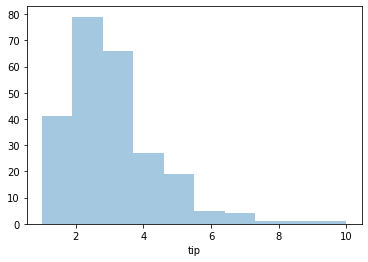

In [4]:
sns.distplot(tips['tip'], kde=False, bins=10);

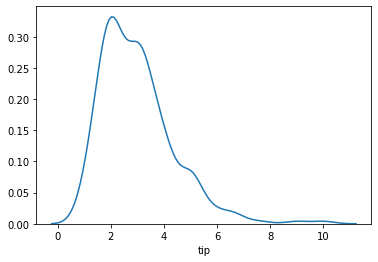

In [8]:
sns.distplot(tips['tip'],hist=False, bins=10); #Kerner Density Estimate (KDE) 
#estimate the probability density function of a continuous random variable. 
#It is used when you need to know the distribution of the variable.

# Bivariate Plots


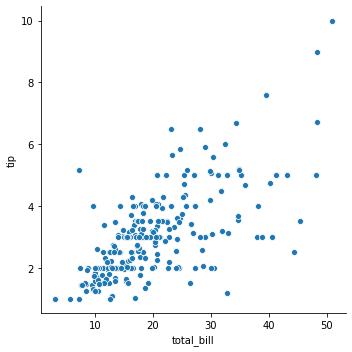

In [9]:
sns.relplot(x="total_bill", y="tip", data=tips);

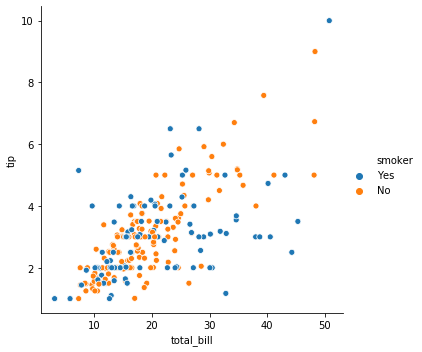

In [10]:
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips);

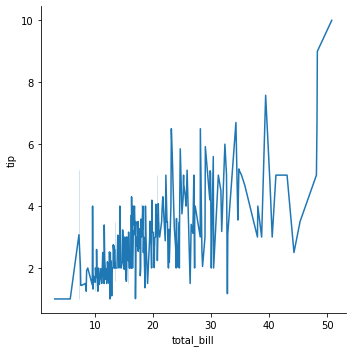

In [11]:
sns.relplot(x="total_bill", y="tip", kind="line", data=tips)

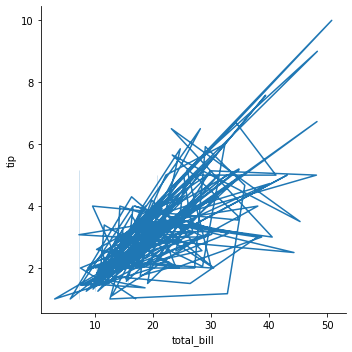

In [12]:
sns.relplot(x="total_bill", y="tip", sort=False, kind="line", data=tips)


# Categorical data types


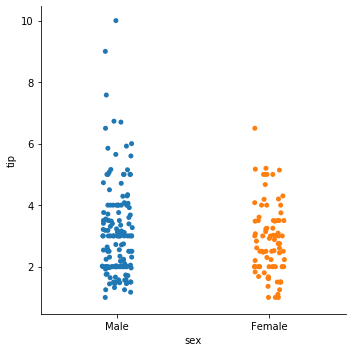

In [13]:
#Scatterplot
sns.catplot(x="sex", y="tip", data=tips);

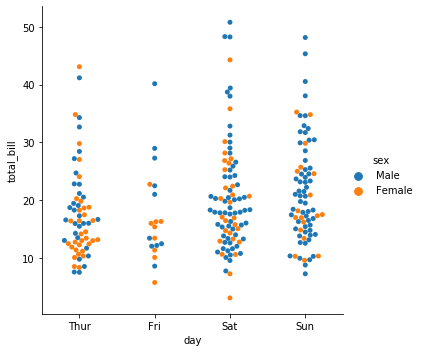

In [14]:
sns.catplot(x="day", y="total_bill", hue="sex", kind="swarm", data=tips);


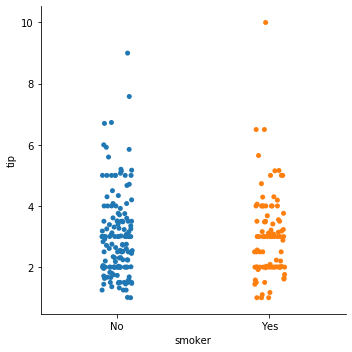

In [15]:
sns.catplot(x="smoker", y="tip", order=["No", "Yes"], data=tips);


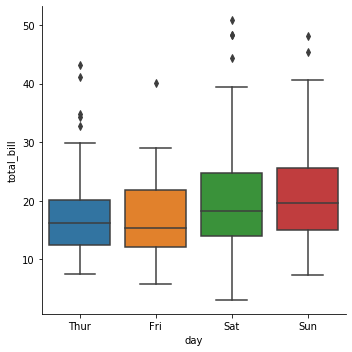

In [16]:
sns.catplot(x="day", y="total_bill", kind="box", data=tips);


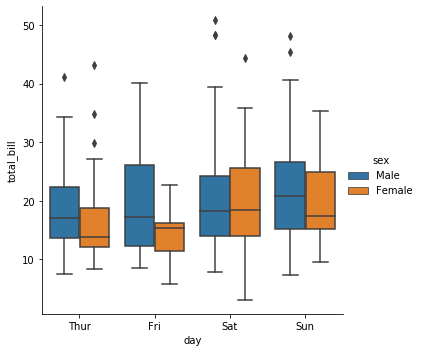

In [17]:
sns.catplot(x="day", y="total_bill", hue="sex", kind="box", data=tips);


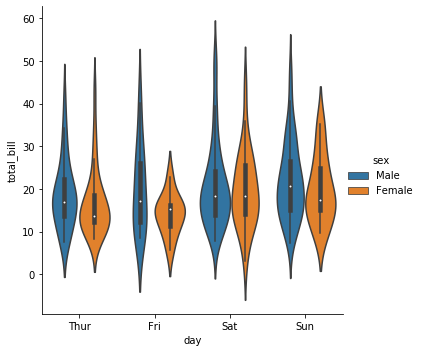

In [18]:
sns.catplot(x="day", y="total_bill", hue="sex",
            kind="violin", data=tips);


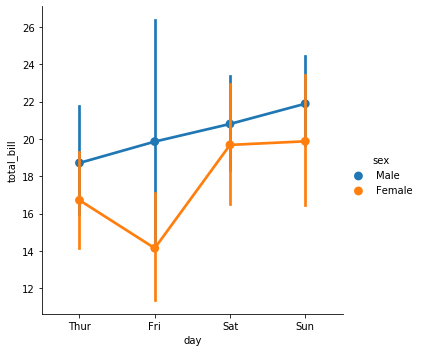

In [19]:
sns.catplot(x="day", y="total_bill", hue="sex", kind="point", data=tips);


In [24]:
import os
path = r"C:\Users\solharsh\Desktop"
os.listdir(path)

['.ipynb_checkpoints',
 'Capstone NLP',
 'Data class imbalance (Up-Down Sampling).ipynb',
 'Data Science',
 'Date Extraction.ipynb',
 'Date1.ipynb',
 'desktop.ini',
 'Ensemble Classifiers.ipynb',
 'GitHub',
 'Imputing with Pandas and Scikit-learn.ipynb',
 'ML Mastery_NLP_1.ipynb',
 'myfile.txt',
 'NLP Capstone LDA.ipynb',
 'NLP Capstone Sentiment Analysis of Finance Minister Speeches.ipynb',
 'Numpy and Pandas Tutorial.ipynb',
 'Personal Documents',
 'Python Tutorial.ipynb',
 'Recommender System via Surprise.ipynb',
 'Speeches.png',
 'SPS',
 'Untitled.ipynb']

In [28]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import nltk
import urllib.request
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from string import punctuation
from heapq import nlargest
nltk.download("stopwords")
from collections import defaultdict


file = open("myfile.txt", "r")
text1 = file.readlines()
text=text1[0]
# tokenize the text
tokens =[t for t in text.split()]

clean_token =tokens[:]
#define irrelevant words that include stop words , punctuations and numbers
stopword = set(stopwords.words('english') + list(punctuation) + list("0123456789") )
for token in tokens:
    if token in stopword:
        clean_token.remove(token)

print(clean_token)

freq = nltk.FreqDist(clean_token)
top_words=[]
top_words=freq.most_common(100)
print(top_words)

sentences = sent_tokenize(text)
print(sentences)

print("###################################################################################")
ranking = defaultdict(int)
for i, sent in enumerate(sentences):
    for word in word_tokenize(sent.lower()):
        if word in freq:
            ranking[i]+=freq[word]
    top_sentences = nlargest(10, ranking, ranking.get)
print(top_sentences)
print("###################################################################################")

print(sentences)
print("###################################################################################")

sorted_sentences = [sentences[j] for j in sorted(top_sentences)]
print(sorted_sentences)

['hello', 'I', 'Harsh', 'period', 'I', 'used', 'stay', 'Indore', 'period', 'I', 'graduated', 'Jigsaw', 'Academy', 'period', 'I', 'love', 'coffee', 'period', 'I', 'love', 'watching', 'movies', 'series', 'period', 'I', 'fan', 'sci-fi', 'thriller', 'genre', 'period', 'I', 'love', 'eating', 'street', 'food', 'period', 'I', 'love', 'hangout', 'Sundays', 'Saturdays', 'period', 'I', 'good', 'learning', 'new', 'concepts', 'period', 'I', 'bad', 'dancing', 'period', 'I', 'like', 'make', 'machine', 'learning', 'models', 'I', 'interested', 'big', 'data', 'NLP', 'period', 'I', 'great', 'listener', 'good', 'public', 'speaker', 'period', 'I', 'love', 'drinking', 'whiskey', 'period', 'I', 'like', 'go', 'dinner', 'period', 'hello', 'period', 'hello', 'I', 'best', 'person', 'ever', 'born', 'planet,', 'I', 'best', 'person', 'ever', 'born', 'planet', 'period', 'I', 'best', 'person', 'ever', 'born', 'planet', 'I', 'Am', 'A', 'Maverick', 'Be', 'A', 'Maverick', 'like', 'Logan', 'Paul,', 'ophthalmologist', 'p

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\solharsh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
